<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >

# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
**Scikit-Learn is characterized by a clean, uniform, and streamlined API**, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will **start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API**, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Data Representation in Scikit-Learn

**Machine learning is about creating models from data**: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to **think about data within Scikit-Learn is in terms of tables of data**.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will **refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.**

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will **refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.**

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
**The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``**, and is most often contained in a **NumPy array or a Pandas ``DataFrame``,** though some Scikit-Learn models also accept SciPy sparse matrices.

**The samples (i.e., rows)** always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

**The features (i.e., columns) always refer to the distinct observations** that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

### Target(레이블) array

In addition to the **feature matrix ``X``**, we also generally work with a **label* or *target* array**, which by convention we will usually call ``y``.
The **target array is usually one dimensional, with length ``n_samples``,** and is generally contained in **a NumPy array or Pandas ``Series``**.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to **predict from the data*: in statistical terms, it is the dependent variable**.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

In [2]:
type(iris)

pandas.core.frame.DataFrame

c:\venvs\DS_Coding\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


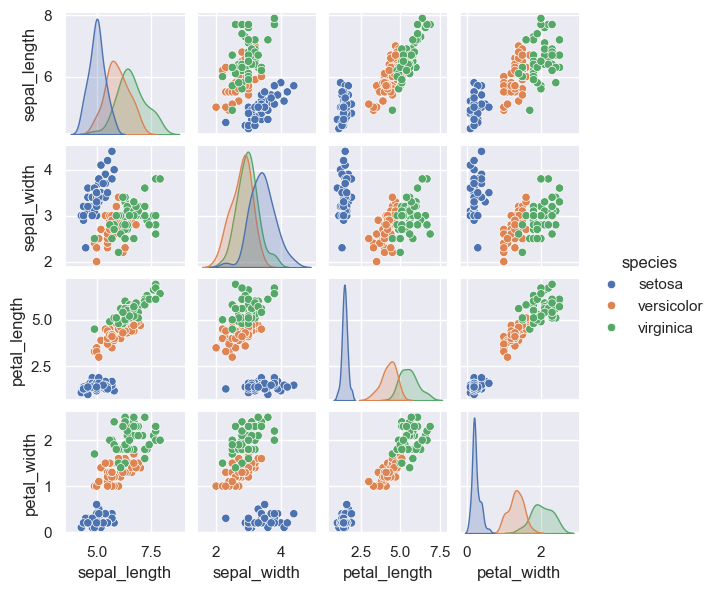

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5); #dataframe에 대한 산점도 행렬을 보여줌,
# hue는 target 값에 대한 다른 색으로 표현 

For use in Scikit-Learn, we will **extract the features matrix and target array from the ``DataFrame``**, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

In [19]:
# 특성 행렬 추출
X_iris = iris.drop('species', axis=1) #열을 삭제
X_iris.shape

(150, 4)

In [20]:
# target 배열 추출
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](../figures/05.02-samples-features.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

- [SKlearn]Scikit-learn, 신동혁·2022년 9월 1일, https://velog.io/@agzg/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DScikit-learn%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0

## Scikit-Learn's Estimator API

- 공부하는 방법: 1) 예제를 먼저 학습후, 2) API를 정리하는 것이 필요 

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only **algorithms are represented by Python classes; datasets are represented   in standard formats (NumPy arrays, Pandas ``DataFrame``s**, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
**Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API**, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the **Scikit-Learn estimator API** are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. **Choose a class of mode**l** by importing the appropriate estimator class from Scikit-Learn.
2. **Choose model hyperparameters** by instantiating this class with desired values.
3. **Arrange data into a features matrix and target vector** following the discussion above.
4. **Fit the model** to your data by calling the ``fit()`` method of the model instance.
5. **Apply the Model to new data**:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

scikit-learn의 Estimator API라고 부르는 이유:

- scikit-learn의 모든 머신러닝 모델이나 알고리즘이 공통된 인터페이스를 사용

- Estimator API는 모델을 **(estimation-학습 의미)**하거나 **예측(prediction)**하는 작업을 일관되게 수행할 수 있도록 통합된 체계를 제공.

핵심 이유: "Estimator"라는 용어의 의미

1. 추정(Estimation)의 중심 역할

- 머신러닝에서 "추정"은 데이터를 기반으로 모델의 파라미터나 속성을 학습하는 과정을 의미.

예: 선형 회귀 모델에서 가중치(w)와 절편(b)를 학습하는 과정.

scikit-learn의 주요 객체는 데이터를 "학습"하거나 "추정"하는 기능을 제공하므로, 이를 Estimator라고 부른다.

2. 일관된 설계와 사용성

- scikit-learn의 모든 Estimator는 공통된 메서드인 fit(), predict(), transform() 등을 구현

> API 사용이 일관되고 직관적.

예를 들어, 회귀, 분류, 클러스터링 등 다양한 알고리즘에서도 동일한 방식으로 코드를 작성할 수 있다.

- Model Hyperparameters는 머신러닝 모델을 학습하기 전에 설정하는 값

  > 모델의 동작 방식과 성능에 큰 영향을 미치는 중요한 요소.

  > 모델의 가중치, 절편 w,b와 다른 파라미터


- Hyperparameters의 특징

1. 모델 학습 전 설정해야 하는 파라미터
    > 데이터를 사용해 학습하기 전에 미리 지정해야 함.

2. 모델 학습 중 변경되지 않음

    > 반면, 학습 과정에서 조정되는 파라미터(parameters) (예: 선형 회귀의 가중치나 절편)는 데이터에 의해 결정됨.

- 선형 회귀 (Linear Regression)

    > 일반적으로 hyperparameter가 없음.
    
    > Ridge Regression 또는 Lasso Regression 같은 정규화 기법에서는 alpha 값이 hyperparameter로 사용.

In [3]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)  # alpha는 정규화 강도를 조절하는 hyperparameter

랜덤 포레스트 (Random Forest)

- Hperparameters 예:

    > n_estimators: 사용할 트리의 개수

    > max_depth: 각 트리의 최대 깊이

    > min_samples_split: 노드를 분할하기 위한 최소 샘플 수

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10) #hyperparameters

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

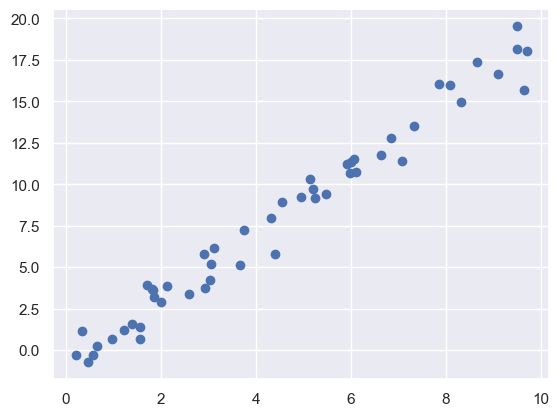

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

**In Scikit-Learn, every class of model is represented by a Python class**.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression # 모델 클래스 - 파이썬 클래스

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

**An important point is that *a class of model is not the same as an instance of a model**.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of **regularization** would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
**In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.**
We will explore how you can quantitatively motivate the choice of hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [7]:
# 클래스 생성자에 hyperparameters를 전달
model = LinearRegression(fit_intercept=True) # 하이퍼파리미터 - 모델의 선택
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API **makes very clear the distinction between *choice of model* and *application of model to data**.

#### 3. Arrange data into a features matrix and target vector (데이터세트 준비)

Previously we detailed the **Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array**.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [8]:
#2차원 특성 행렬 > y = X.w + b > 벡터 연산 이해해야 한다 
X = x[:, np.newaxis]
X.shape

(50, 1)

scikit-learn의 데이터 형식 요구사항

1. scikit-learn의 모든 모델은 입력 데이터 **X**가 2차원 배열이어야 한다고 요구.

입력 데이터 X: (n_samples, n_features)

- n_samples: 샘플(데이터 포인트)의 개수

- n_features: 각 샘플에 포함된 특징(특성)의 개수

2. X = np.array([1,2,3,4]) shape (4, )이면 samples = 4인지 features = 4인지 헷갈린다 

변환이 필요한 이유: 모델의 데이터 처리 방식

- 선형 회귀 모델의 작동 방식:

    y=w⋅X+b

X: (n_samples, n_features)

w: (n_features,) 가중치

b: 절편(intercept) > scalar (1)

y: 예측값, (n_samples,) 크기를 가짐.

X가 1차원 배열이면 행렬 곱 연산을 수행할 수 없으므로, 반드시 2차원 배열이어야 함.

In [10]:
X = x[:, np.newaxis]  # x의 형태를 (n_samples, n_features)로 변경
model.fit(X, y)       # scikit-learn은 X가 2차원 배열이어야 작동


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


scikit-learn에서 w와 크기 관계

w의 크기는 자동으로 X의 열(column)의 개수(n_features)와 맞게 조정:

X.shape=(50,1)이면 w.shape=(1,)

X.shape=(50,3)이면 w.shape=(3,)

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [11]:
model.fit(X, y) # 훈련데이터로 학습 > 가중치와 절편을 구한다

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention **all model parameters that were learned during the ``fit()`` process have trailing underscores**; for example in this linear model, we have the following:

In [12]:
# 학습으로 얻어진 모델 파라미터 : y = wx + b
model.coef_ # w에 해당됨

array([1.9776566])

In [13]:
model.intercept_ # b에 해당됨

np.float64(-0.903310725531111)

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [14]:
xfit = np.linspace(-1, 11) # 테스트데이터

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

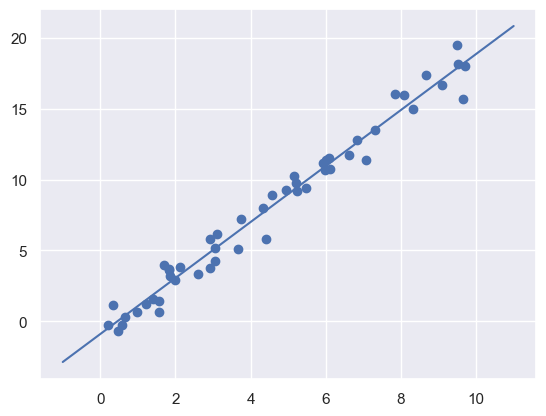

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely **simple generative model known as Gaussian naive Bayes**, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so **fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification**, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

GaussianNB는 데이터를 분포로 요약

- GaussianNB는 데이터를 각각의 클래스마다 정리하고, 각 특징(feature)이 특정 **정규 분포(Gaussian distribution)**를 따른다고 가정.

    > 정규 분포는 평균과 표준편차로 정의.

    > GaussianNB는 각 클래스에 대해 이 평균과 표준편차를 학습.

    > "데이터가 어느 구간에 얼마나 자주 나타나는가?"를 모델이 정리 학습.

- 새로운 데이터가 들어왔을 때 분포에 따라 판단

    > GaussianNB는 새로운 데이터가 들어왔을 때, 학습된 분포 중 어느 클래스의 분포에서 가장 가능성이 높은지 판단.

    > 이 과정은 **가우시안 곡선(종 모양 곡선)**의 높이를 비교하는 것으로 이해:

    > 특정 클래스에서 학습된 평균에 가까운 데이터일수록 "가능성이 높다"고 판단.

    > 평균에서 멀어질수록 "가능성이 낮다"고 판단

- GaussianNB는 학습후 판단 논거:

    > "각 클래스는 고유한 특징 분포를 가지고 있다."

    > "새로운 데이터가 들어오면, 이 데이터를 어떤 클래스의 분포와 가장 비슷한지 비교한다."

“가우스 나이브 베이즈(Gaussian Naive Bayes)”

- 베이즈 정리: 조건부 확률 P(C|X) = P(X|C).P(C) / P(X) 특성 X가 주어졌을 때 클래스 C일 확률

- 나이브: 모든 feature들이 서로 독립이라고 가정

    > 클래스 C가 주어졌을 때 각 feature(특성)xi 들은 서로 독립

    > P(x1,x2|C) = P(x1|C) * P(x2|C)

    > P('free' & 'click' |spam) = P('free'|spam) * P('click'|spam)

- Gaussian Naive Bayes에서 "Gaussian"은 무엇?

    > 각 특성이 정규 분포를 따른다고 가정: P(xi|C) = 가우스분포(xi: 평균, 분산)

나이브 베이즈 정리(Naive Bayes Theorem)와 나이브 베이즈 분류(Naive Bayes Classification)
출처: https://glanceyes.com/entry/나이브-베이즈-분류Naive-Bayes-Classification [지그시:티스토리]

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

- species 열이 클래스(label): species는 꽃의 품종, 세 가지 클래스:

    > setosa, versicolor, virginica

- Gaussian Naive Bayes는 이 클래스를 예측하는 데 사용

    > 주어진 꽃잎(petal)과 꽃받침(sepal)의 기반으로 어떤 품종인지 예측.


- 특성 (Features)

    > sepal length, sepal width, petal length, petal width

- Gaussian Naive Bayes는 각 클래스(species)에 대해 이 특징들의 평균(μ)과 표준편차(σ)를 계산.

- GaussianNB의 역할
    1) 클래스별 특성의 평균과 표준편차 계산:

      각 클래스(setosa, versicolor, virginica)에서 모든 특성(sepal length, sepal width, ...)에 대해 평균과 표준편차를 계산

      예: setosa 클래스의 sepal length 평균과 표준편차를 계산.

    2) 새로운 데이터가 들어왔을 때:

        새로운 데이터(예: sepal length=5.0, sepal width=3.5, ...)가 각 클래스의 분포에 얼마나 잘 맞는지 확률을 계산

    3) 가장 높은 확률을 가진 클래스를 예측.


With the data arranged, we can follow our recipe to predict the labels:

In [22]:
from sklearn.naive_bayes import GaussianNB # 1. 모델 클래스 선택
model = GaussianNB()                       # 2. 모델 인스턴스화
model.fit(Xtrain, ytrain)                  # 3. 모델을 데이터에 적합
y_model = model.predict(Xtest)             # 4. 새 데이터에 대해 예측

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

특징별 평균과 표준편차 계산:

- setosa, versicolor, virginica 각각에 대해 sepal과 petal의 길이와 너비의 분포를 학습.

- 새로운 데이터에 대해 클래스 예측:

    > 주어진 특징 값이 어느 클래스의 분포에 가장 적합한지를 평가하여 예측.


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality(차원 축소하여 시각화)

As an example of an unsupervised learning problem, let's take a look at **reducing the dimensionality of the Iris data so as to more easily visualize** it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

**The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.**
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use **principal component analysis (PCA**; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [24]:
from sklearn.decomposition import PCA  # 1. 모델 클래스 선택 
model = PCA(n_components=2)            # 2. 초모수로 모델 인스턴스화
model.fit(X_iris)                      # 3. 데이터에 적합, y는 지정안함!
X_2D = model.transform(X_iris)         # 4. 데이터를 2차원으로 변환

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

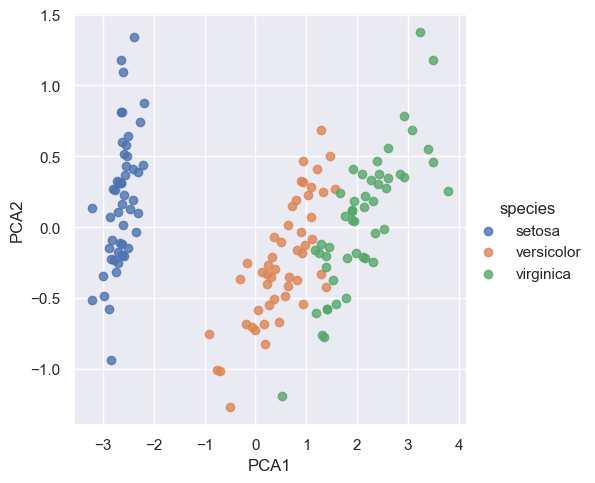

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering (군집화)

Let's next look at applying clustering to the Iris data.
A **clustering algorithm attempts to find distinct groups of data without reference to any labels**.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

- 가우스 혼합 모델은 여러 개의 가우시안 분포를 혼합하여 데이터가 생성되었다고 가정

- 각 데이터가 어떤 가우시안에서 나왔을 확률을 기반으로 군집화하는 방법

    > “혼합”은 여러 분포가 함께 섞여 전체 데이터 분포를 설명한다는 의미

In [26]:
from sklearn.mixture import GaussianMixture  # 1. 모델 클래스 선택 
model = GaussianMixture(n_components=3,
            covariance_type='full')      # 2. 초모수로 모델 인스턴스화 
model.fit(X_iris)                        # 3. 데이터에 적합. y 는 지정하지 않음! 
y_gmm = model.predict(X_iris)            # 4. 군집 레이블을 결정

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

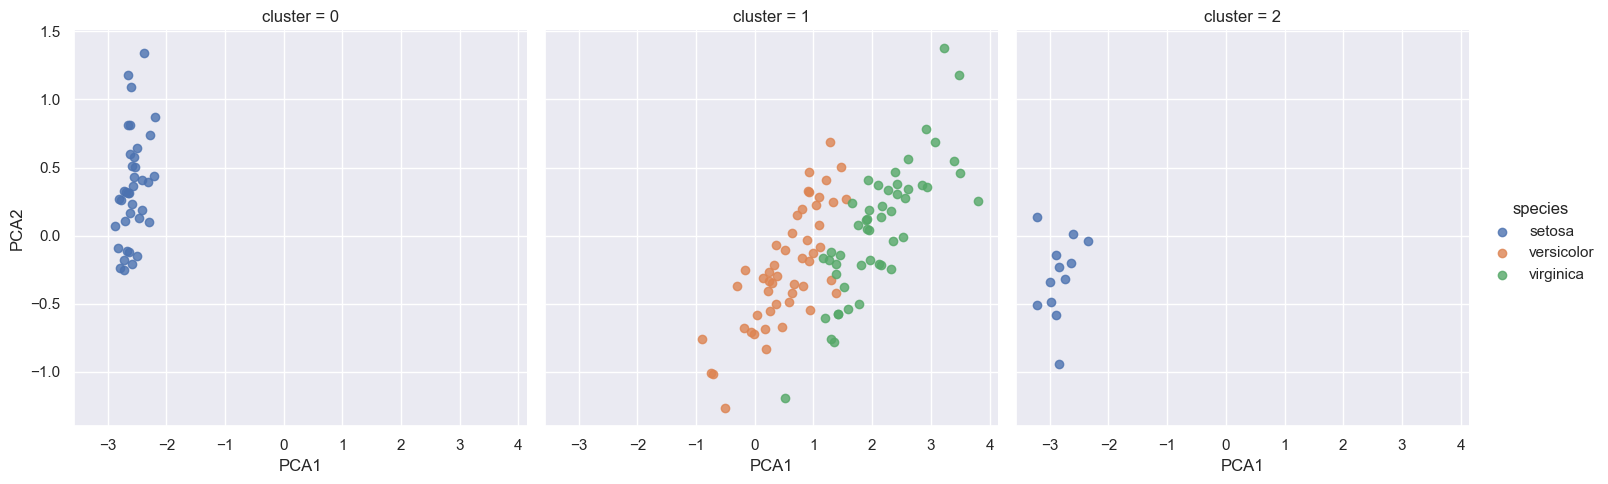

In [27]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the **optical character recognition problem: the identification of hand-written digits.**
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

In [29]:
print(type(digits))
print(digits.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

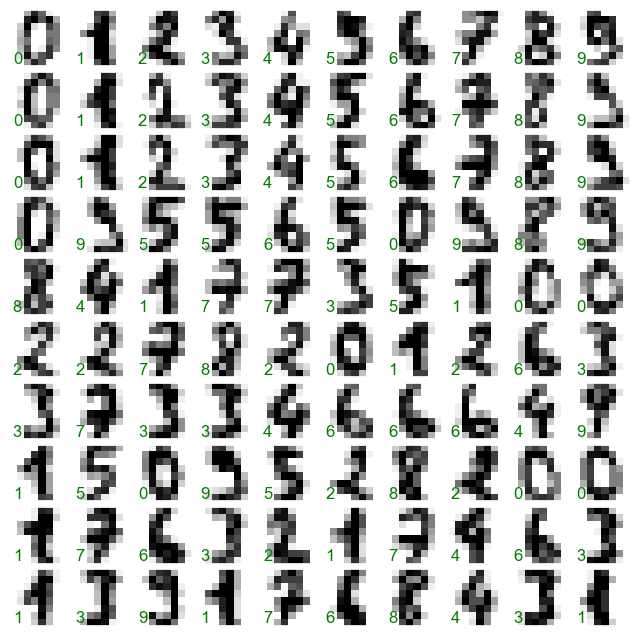

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction(차원 축소)

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

**Isomap (Isometric Mapping)**은 고차원 데이터를 저차원으로 변환

1. Isomap의 핵심 아이디어
데이터 간의 "진짜 거리"를 기반으로 차원을 축소

2. A와 B가 "실제 경로 거리"를 기반으로 데이터를 저차원에 투영.

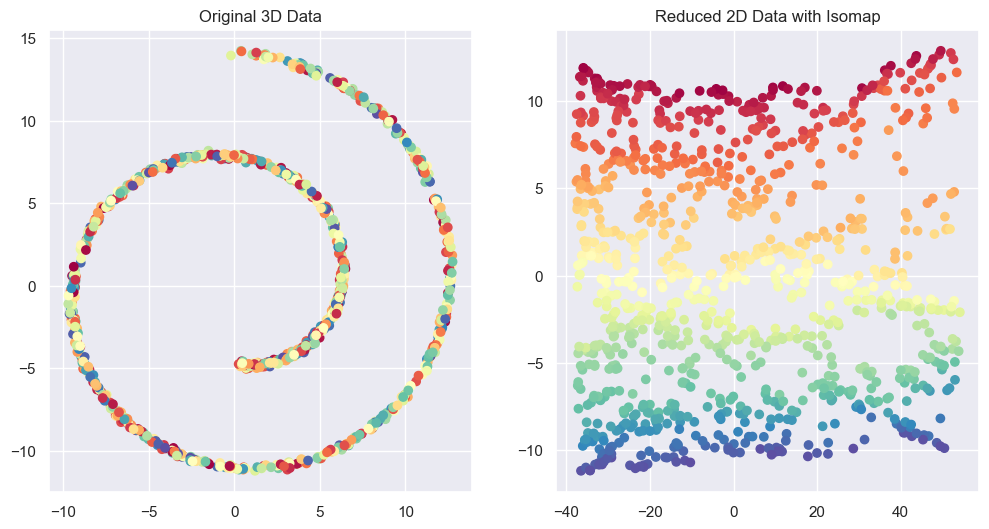

In [28]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# 샘플 데이터 (Swiss Roll 생성)
data, _ = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Isomap 적용
isomap = Isomap(n_neighbors=10, n_components=2)
data_reduced = isomap.fit_transform(data)

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(data[:, 0], data[:, 2], c=data[:, 1], cmap='Spectral')
ax1.set_title("Original 3D Data")
ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], c=data[:, 1], cmap='Spectral')
ax2.set_title("Reduced 2D Data with Isomap")
plt.show()


[1-6]ISOMAP & LLE, Gitbook, 17.6.22, https://minye-lee19.gitbook.io/sw-engineer/business-analytics/class/1-6-isomap-and-lle

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\venvs\DS_Coding\Lib\site-packages\sklearn\manifold\_isomap.py:360: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\venvs\DS_Coding\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

C:\Users\user\AppData\Local\Temp\ipykernel_18828\4159090466.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


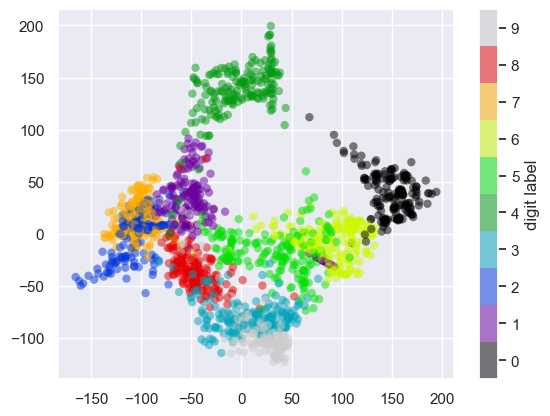

In [35]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, **zeros (in black) and ones (in purple)** have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum **between ones and fours**: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and **fit a Gaussian naive Bayes model**:

In [31]:
X[:5] #이미지

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [32]:
y[:5] #숫자

array([0, 1, 2, 3, 4])

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

- load_digits() 데이터셋에 **Gaussian Naive Bayes (GaussianNB)**를 적용

  > 손글씨 숫자 이미지(0부터 9까지의 숫자)를 보고, 어떤 숫자인지 예측하는 분류 모델을 만든다.
  
  > Gaussian Naive Bayes는 확률을 기반으로 예측하는 분류 알고리즘.

GaussianNB 적용의 의미를 단계별로 쉽게 설명

1. 데이터 살펴보기

- load_digits()는 8x8 픽셀로 구성된 손글씨 숫자 이미지 데이터.

  > 입력 데이터 (digits.data): 숫자 이미지를 펼쳐서 **64개의 픽셀 값(특징)**으로 표현한 데이터.

  > 타깃 데이터 (digits.target): 각 이미지가 나타내는 실제 숫자(0~9).

2. GaussianNB 모델 준비

  > GaussianNB는 데이터를 각 숫자(클래스)마다 **정규분포(가우시안 분포)**를 따른다고 가정.

  > 숫자 이미지를 구성하는 각 픽셀의 값이 해당 숫자(클래스)에 따라 다른 분포를 가질 것이라고 모델링.

3. 학습

  > 모델이 데이터를 학습하면서 각 숫자(클래스)에 대해 픽셀 값의 평균과 표준편차를 계산.

  > 예를 들어:

    0이라는 숫자에서 첫 번째 픽셀의 평균은 2.3, 표준편차는 1.1로 계산.

    1이라는 숫자에서 첫 번째 픽셀의 평균은 4.1, 표준편차는 0.9로 계산.

    각 숫자의 분포 정보를 학습한 뒤, 
    
    새로운 이미지가 주어졌을 때 이 이미지가 각 숫자에 속할 확률을 계산.

4. 예측

  > 새로운 숫자 이미지(8x8 픽셀 데이터)가 들어오면, 
  
  > GaussianNB는 각 숫자(클래스)에 대해 확률을 계산.

  > 가장 확률이 높은 숫자를 예측 결과로 반환

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the **confusion matrix**, which we can compute with Scikit-Learn and plot with Seaborn:

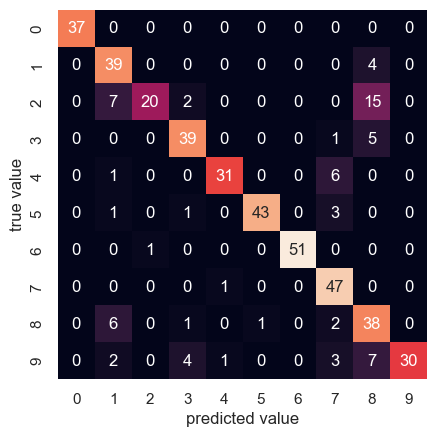

In [36]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, **a large number of twos here are mis-classified as either ones or eights**.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and **red for incorrect labels**:

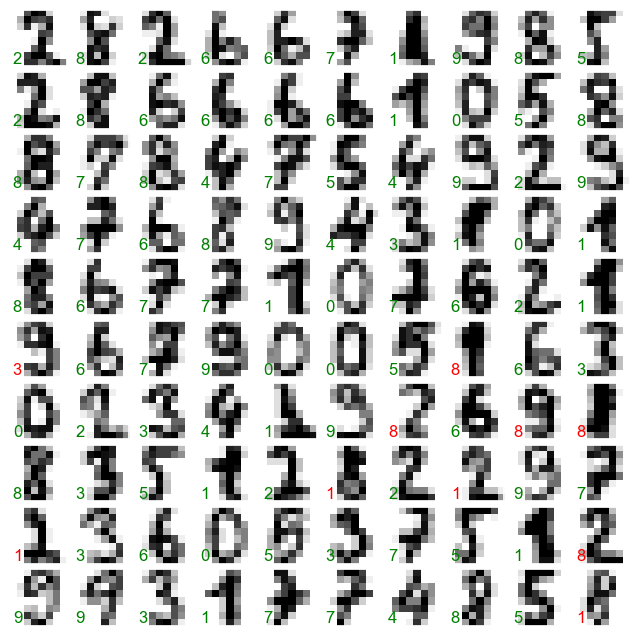

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

## Summary

In this section we have covered the essential features of the Scikit-Learn data representation, and the **estimator API**.
Regardless of the type of estimator, the same **import/instantiate/fit/predict** pattern holds.
Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps **the most important topic in machine learning: how to select and validate your model**.

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >